# Tarea 2

#### Eva Yazmín Santiago Santos
#### César Daniel Rodríguez Rosenblueth

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

In [1]:
using PyPlot

In [2]:
Pkg.add("Vega")
using Vega

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Vega
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [15]:
M=10000
r = randn(M)

function histograma(nh, rdm)
    max = maximum(rdm)
    min = minimum(rdm)
    dx = (max - min)/nh
    nhist=[]
    hist=zeros(nh)
    n=0
    for
        k=1:nh
        delx = min+k*dx
        push!(nhist,delx)
    end
    for j in rdm 
        for i= 1:nh
            if i<nh
                if j>=(min+dx*(i-1))
                    if j<(min+dx*i)
                        hist[i]=hist[i]+1
                    end  
                end
            end
            if i==nh
                if j>=(min+dx*(i-1))
                    hist[i]=hist[i]+1
                end
            end
        end
    end
    barplot(x=nhist,y=hist)    
end 




histograma (generic function with 1 method)

In [16]:
histograma(100,r)

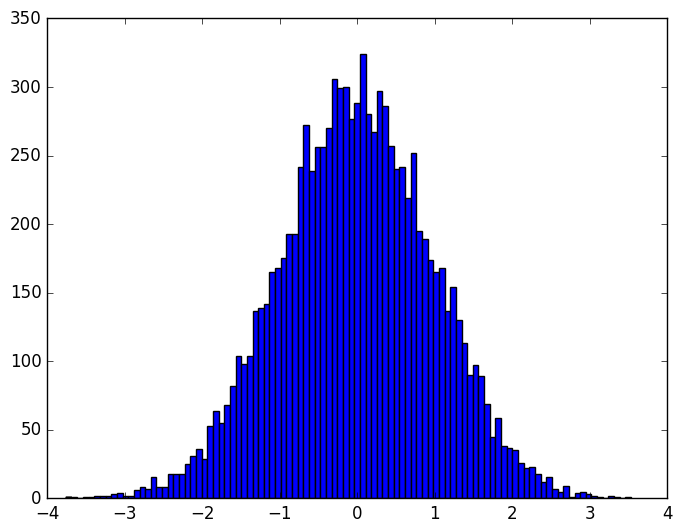

([1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0  …  4.0,5.0,3.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0],[-3.75928,-3.68638,-3.61349,-3.54059,-3.4677,-3.3948,-3.32191,-3.24901,-3.17612,-3.10323  …  2.87411,2.94701,3.0199,3.0928,3.16569,3.23858,3.31148,3.38437,3.45727,3.53016],Any[PyObject <matplotlib.patches.Rectangle object at 0x32195add8>,PyObject <matplotlib.patches.Rectangle object at 0x321cf2c50>,PyObject <matplotlib.patches.Rectangle object at 0x321ce0908>,PyObject <matplotlib.patches.Rectangle object at 0x321cfb4a8>,PyObject <matplotlib.patches.Rectangle object at 0x321cf2b00>,PyObject <matplotlib.patches.Rectangle object at 0x321cf2ac8>,PyObject <matplotlib.patches.Rectangle object at 0x321cf2828>,PyObject <matplotlib.patches.Rectangle object at 0x321d02080>,PyObject <matplotlib.patches.Rectangle object at 0x321d0e1d0>,PyObject <matplotlib.patches.Rectangle object at 0x321d09f60>  …  PyObject <matplotlib.patches.Rectangle object at 0x321e13e80>,PyObject <matplotlib.patches.Rectangle object at 0x

In [17]:
plt[:hist](r, 100)

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


In [35]:
#inciso (a)
function promvar(rdm)
    p=0
    n=length(rdm)
    promedio=sum(rdm)/n
    for h in rdm
        p=p+(h-promedio)^2
    end
    var=p/n
    return(promedio, var)
end
        

promvar (generic function with 1 method)

In [36]:
promvar(r)

(-0.019749565160582534,0.9693690344274132)

In [27]:
(mean(r), var(r))

(-0.019749565160582534,0.9694659810255135)

In [37]:
promvar(r)[1]-mean(r)

0.0

In [46]:
error1=abs(promvar(r)[2]-var(r))

9.694659810033368e-5

In [47]:
error1/var(r)*100

0.00999999999977125

In [44]:
function online_variance(rdm)
    n = 0
    mean = 0.0
    M2 = 0.0
     
for x in rdm
        n += 1
        delta = x - mean
        mean += delta/n
        M2 += delta*(x - mean)
    end
    if n < 2
        return (mean, NaN)
    else
    return (mean, M2 / (n - 1))
    end
end

online_variance (generic function with 1 method)

In [45]:
online_variance(r)

(-0.0197495651605826,0.969465981025519)

In [51]:
error2=abs(online_variance(r)[1]-promvar(r)[1])

6.591949208711867e-17

In [53]:
error2/abs(promvar(r)[1])*100

3.3377692901656934e-13

In [54]:
error3=abs(online_variance(r)[2]-promvar(r)[2])

9.694659810577377e-5

In [55]:
error3/var(r)*100

0.01000000000033239

In [56]:
error3/promvar(r)[2]*100

0.010001000100342402

In [87]:
a=rand(100)
b=rand(10000)
c=rand(10000000);

In [88]:
@time mean(a)
@time mean(b)
@time mean(c)

0.5000310600263772

0.000002 seconds (5 allocations: 176 bytes)
  0.000010 seconds (5 allocations: 176 bytes)
  0.006475 seconds (5 allocations: 176 bytes)


In [97]:
@time promvar(a) 
@time promvar(b)
@time promvar(c)

  0.000010 seconds (206 allocations: 3.328 KB)
  0.002465 seconds (20.01 k allocations: 312.719 KB, 86.81% gc time)
  

(0.5000310600263772,0.08333121207311349)

0.302568 seconds (20.00 M allocations: 305.176 MB, 9.09% gc time)


In [98]:
@time var(a),mean(a)
@time var(b),mean(b)
@time var(c),mean(c)

(0.083331220406239,0.5000310600263772)

0.000013 seconds (10 allocations: 336 bytes)
  0.000028 seconds (10 allocations: 336 bytes)
  0.019742 seconds (10 allocations: 336 bytes)


In [96]:
@time online_variance(a)
@time online_variance(b)
@time online_variance(c)

(0.5000310600264376,0.08333122040623048)

0.000003 seconds (5 allocations: 192 bytes)
  0.000080 seconds (5 allocations: 192 bytes)
  0.073512 seconds (5 allocations: 192 bytes)


## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

In [6]:
function simpson(f,a,b)
    int=((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b))
end

simpson (generic function with 1 method)

In [7]:
simpson(x-> x,2,4)

6.0